<a href="https://colab.research.google.com/github/Xialu0803/255-SFbike-data/blob/main/pa_MLP%26%26dtr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error
import io

In [2]:
#from google.colab import files
#uploaded = files.upload()
df = pd.read_csv('./pa.csv')

In [3]:
df.head()

,Unnamed: 0,trips,total_docks,year,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,...,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain,Rain-Thunderstorm,weekend
0,4,19,75,2013,8,3,78.0,71.0,64.0,62.0,...,23.0,0.0,4.0,355.0,0,0,1,0,0,0
1,9,9,75,2013,8,4,84.0,74.0,64.0,63.0,...,23.0,0.0,2.0,5.0,0,0,1,0,0,0
2,13,16,75,2013,8,5,76.0,69.0,62.0,61.0,...,25.0,0.0,0.0,353.0,0,0,1,0,0,1
3,19,7,75,2013,9,6,80.0,71.0,62.0,62.0,...,23.0,0.0,1.0,354.0,0,0,1,0,0,1
4,24,4,75,2013,9,0,76.0,71.0,65.0,63.0,...,22.0,0.0,5.0,337.0,0,0,1,0,0,0


In [4]:
df.shape

(644, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      644 non-null    int64  
 1   trips                           644 non-null    int64  
 2   total_docks                     644 non-null    int64  
 3   year                            644 non-null    int64  
 4   month                           644 non-null    int64  
 5   weekday                         644 non-null    int64  
 6   max_temperature_f               644 non-null    float64
 7   mean_temperature_f              644 non-null    float64
 8   min_temperature_f               644 non-null    float64
 9   max_dew_point_f                 644 non-null    float64
 10  mean_dew_point_f                644 non-null    float64
 11  min_dew_point_f                 644 non-null    float64
 12  max_humidity                    644 

In [6]:
labels = df.trips
train = df.drop(['trips'], 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state = 2)

def scoring(clf):
    scores = cross_val_score(clf, X_train, y_train, cv=15, n_jobs=1, scoring = 'neg_median_absolute_error')
    print (np.median(scores) * -1)

In [8]:
dtr = DecisionTreeRegressor(min_samples_leaf = 4,
                            max_depth = 32,
                            random_state = 2)
dtr.fit(X_train, y_train)
scoring(dtr)

3.166666666666667


In [9]:
dtr_preds = dtr.predict(X_test)

In [10]:
regr = MLPRegressor(random_state=1, max_iter=2000).fit(X_train, y_train)
scoring(regr)

2.6290257535095933


In [11]:
regr_preds = regr.predict(X_test)

In [12]:
print(f'median_absolute_error of decision tree regressor: {median_absolute_error(y_test, dtr_preds)}')
print(f'median_absolute_error of mlp regressor: {median_absolute_error(y_test, regr_preds)}')

median_absolute_error of decision tree regressor: 2.75
median_absolute_error of mlp regressor: 2.2252900518697585


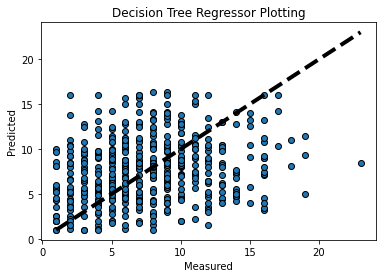

In [13]:
#Decision Tree Regressor Plotting
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(dtr, X_train, y_train, cv=5)
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.title('Decision Tree Regressor Plotting')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

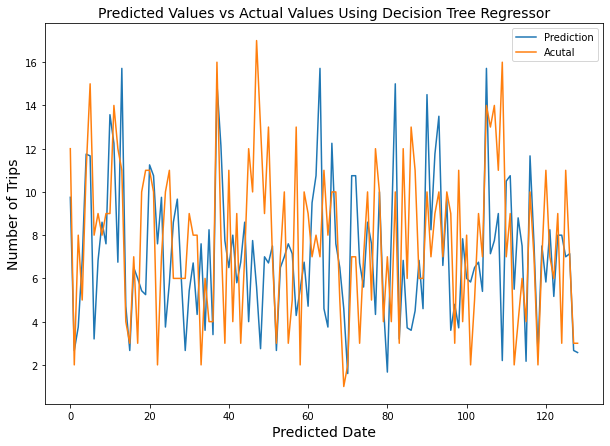

In [14]:
dtr.fit(X_train, y_train )
predicted = dtr.predict(X_test)
y_test.reset_index(drop = True, inplace = True)

plt.figure(figsize=(10,7))
plt.plot(predicted)
plt.plot(y_test)
plt.legend(['Prediction', 'Acutal'])
plt.ylabel("Number of Trips", fontsize = 14)
plt.xlabel("Predicted Date", fontsize = 14)
plt.title("Predicted Values vs Actual Values Using Decision Tree Regressor", fontsize = 14)
plt.show()